# Passenger Flight Satisfaction

**About:** this dataset contains information about an airline's passanger satisfaction, as well as some demographic information about them.

**My goals are:**
- to identify features associated with overal dissatisfaction
- to analyse differences between satisfied and dissatisfied passengers
- to provide recommendations about improving passenger satisfaction ratings.

**My approach is:**
- to compare passenger groups in order to see if it would be useful to target a specific group (that might be most dissatisfied)
- to identify flight aspects that are most associated with satisfaction.

## Part 1: Data Exploration

In [1]:
# Loading packages

import pandas as pd # data analytics
import numpy as np # math
import matplotlib.pyplot as plt # data visualisation
import matplotlib.patches as mpatches
import seaborn as sns # data visualisation

%matplotlib inline

C:\Users\laimi\miniconda3\envs\da_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading datasets

df1 = pd.read_csv(r'C:\Users\laimi\Desktop\Studies\Data Analytics\Python\data\flight_satisfaction\train.csv')
df2 = pd.read_csv(r'C:\Users\laimi\Desktop\Studies\Data Analytics\Python\data\flight_satisfaction\test.csv')

In [3]:
# The data originally came already split into train-test subsets for machine learning purposes, so I will merge them
# to be able to clean and modify together.

df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [5]:
# Checking data types and value counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [6]:
# Some descriptive statistics

df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
# Checking for duplicate entries

df.duplicated().sum()

0

In [8]:
# Checking for null values

df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [9]:
# A closer look at null value containing rows - other datapoints seem intact.

df[df['Arrival Delay in Minutes'].isnull()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
128037,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
129032,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


<AxesSubplot:>

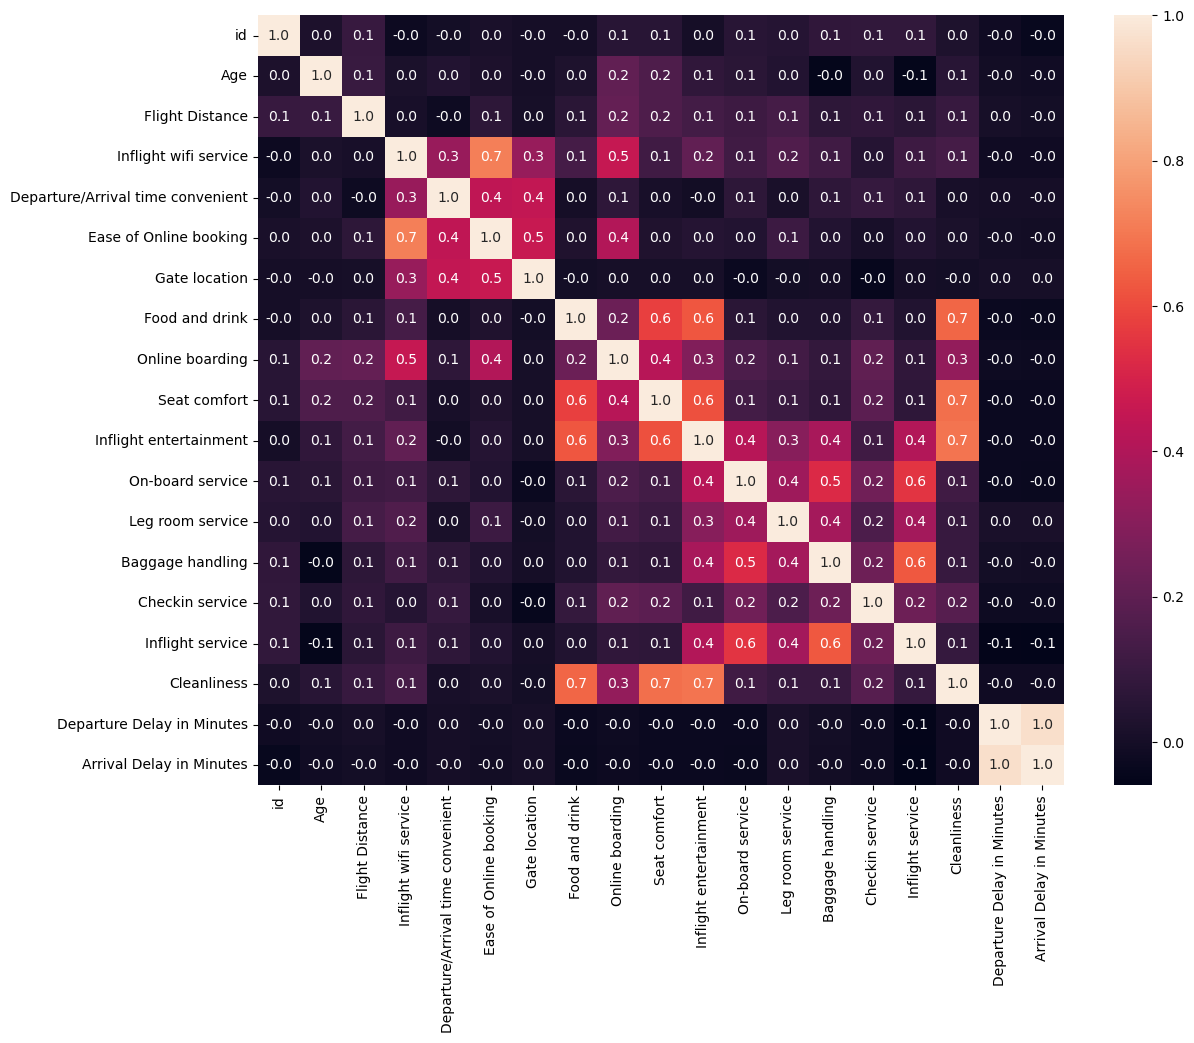

In [10]:
# A quick look at correlations between numeric variables

plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

Since there are some null values in 'Arrival Delay' column and it is perfectly correlated to 'Departure Delay',
I will drop that column later on.

Now let's explore categorical variables a bit more:

In [11]:
# Categories for 'Types of Travel'

df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [12]:
# Categories for 'Class'

df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [13]:
# Categories for 'Customer Type'

df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

At first glance, we have:
- 2 redundant columns that can be dropped ('id', and 'Arrival Delay').
- 4 columns with categorical demographic and travel data ('Gender', 'Customer Type', 'Type of Travel', and 'Class')
- 4 columns with numerical demographic and travel data (Age, Flight Distance, Departure Delay and Arrival Delay)
- 9 columns with categorical oridnal data, indicating the level of satisfaction regarding various aspects of travel on a scale 0-5.

I would expect Loyal Customers flying Business Class to be more satisfied with their flights overall.
I would also expect high correlation between overall satisfaction and higher scores to the 9 questions aout the flight.

Let's visualise passenger distribution by category, and their satisfaction levels.

### 1.2 Categorical Variables

I want to compare different groups of passengers to know which has the largest number of dissatisfied customers and thus would be best to target in order to improve the ratings.

In [14]:
# Separating satisfied and dissatisfied values into different dataframes for comparison

satisfied = df[df['satisfaction'] == 'satisfied']
dissatisfied = df[df['satisfaction'] == 'neutral or dissatisfied']

In [15]:
# A quick look at which groups have most dissatisfied passengers

dissatisfied[['Gender', 'Customer Type', 'Type of Travel', 'Class']].value_counts()

Gender  Customer Type      Type of Travel   Class   
Male    Loyal Customer     Personal Travel  Eco         14761
Female  Loyal Customer     Personal Travel  Eco         14727
        disloyal Customer  Business travel  Eco          6263
        Loyal Customer     Business travel  Business     5608
Male    Loyal Customer     Business travel  Business     5470
        disloyal Customer  Business travel  Eco          5254
        Loyal Customer     Business travel  Eco          3105
Female  Loyal Customer     Business travel  Eco          3104
        disloyal Customer  Business travel  Business     2884
Male    disloyal Customer  Business travel  Business     2672
Female  Loyal Customer     Personal Travel  Eco Plus     2084
Male    Loyal Customer     Personal Travel  Eco Plus     2027
                                            Business     1183
Female  Loyal Customer     Personal Travel  Business     1164
Male    Loyal Customer     Business travel  Eco Plus     1089
Female  Loyal Cus

In [16]:
dissatisfied[(dissatisfied['Customer Type'] == 'Loyal Customer') | (dissatisfied['Class']=='Eco')]['id'].count()

67041

In [17]:
dissatisfied[(dissatisfied['Customer Type'] == 'disloyal Customer') | (dissatisfied['Class']=='Eco')]['id'].count()

53777

Seems like most dissatisfied passengers (30,000) are Loyal customers on Personal travel flying Eco class.

I want to have a closer look at groups separately and visualise the numbers.

In [18]:
# Creating a function that I can later use to create pie charts.

def draw_pie_chart(column, title, **kwarg):
    
    explode = np.zeros(column.nunique()) # Creating gaps between pie slices
    explode[:-1] = 0.1 # Setting gap size
    
    # Using aggregated column values to draw pie chart
    column.value_counts().plot(
        kind='pie',
        title=title,
        ylabel='',
        explode=explode,
        wedgeprops={'edgecolor':'k'},
        shadow=True,
        autopct='%1.2f%%',
        **kwarg)
    
    plt.plot

In [19]:
# Creating a function to draw stacked bar charts.

def draw_barplot(df, col, **kwarg):
    
    # Creating two temp dataframes with total passenger numbers, and satisfied ones only
    totals = df.groupby(col)['satisfaction'].count().reset_index()
    dissatisfied = df[df['satisfaction']!='satisfied'].groupby(col)['satisfaction'].count().reset_index()
    
    # Creating two barplots stacked on top of each other
    bar1 = sns.barplot(
        x=col,
        y='satisfaction',
        data=totals,
        color='mediumturquoise',
        **kwarg)
    
    bar2 = sns.barplot(
        x=col,
        y='satisfaction',
        data=dissatisfied,
        color='indianred',
        **kwarg)
    
    bar1.set(ylabel='Passenger No.')
    
    # Adding legend
    top_bar = mpatches.Patch(color='indianred', label='Dissatisfied')
    bottom_bar = mpatches.Patch(color='mediumturquoise', label='Satisfied')
    bar1.legend(handles=[top_bar, bottom_bar])

In [20]:
# A function for kde plots - it creates two overlapping distribution plots.
# I will use it to compare distribution of satisfied vs dissatisfied passengers.

def draw_kde_plot(column, **kwarg):
    
    sns.set_style('whitegrid')
    
    # 1st plot that will use filtered satisfied-only data that I will separate from main df later
    ax = sns.kdeplot(
        x=column,
        data=satisfied,
        fill=True,
        alpha=0.6, # transparency
        color='b',
        label='satisfied',
        **kwarg
    )
    
    # 2nd plot that will use filtered 'unsatisfied' only data that I will separate from main df later
    ax = sns.kdeplot(
        x=column,
        data=dissatisfied,
        fill=True,
        alpha=0.6, # transparency
        color='r',
        label='dissatisfied',
        **kwarg
    )
    
    ax.set(ylabel=None)
    ax.yaxis.set_ticklabels([])
    ax.legend()

In [21]:
# Comparing overall size of satisfied and unsatisfied passenger groups

df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

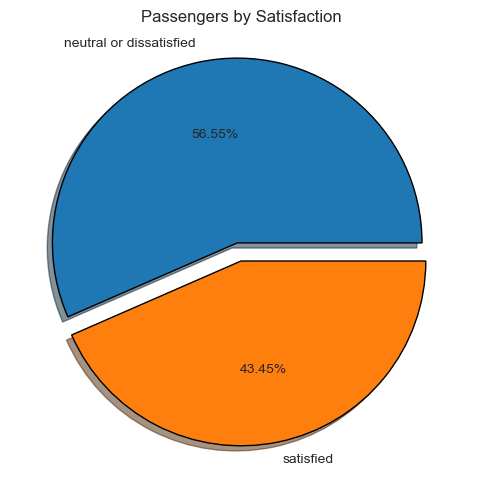

In [22]:
# Visualising the above

sns.set_style(style='whitegrid')
draw_pie_chart(df['satisfaction'], 'Passengers by Satisfaction', figsize=(6,6))

There are more dissatisfied passengers overall, but not by much.

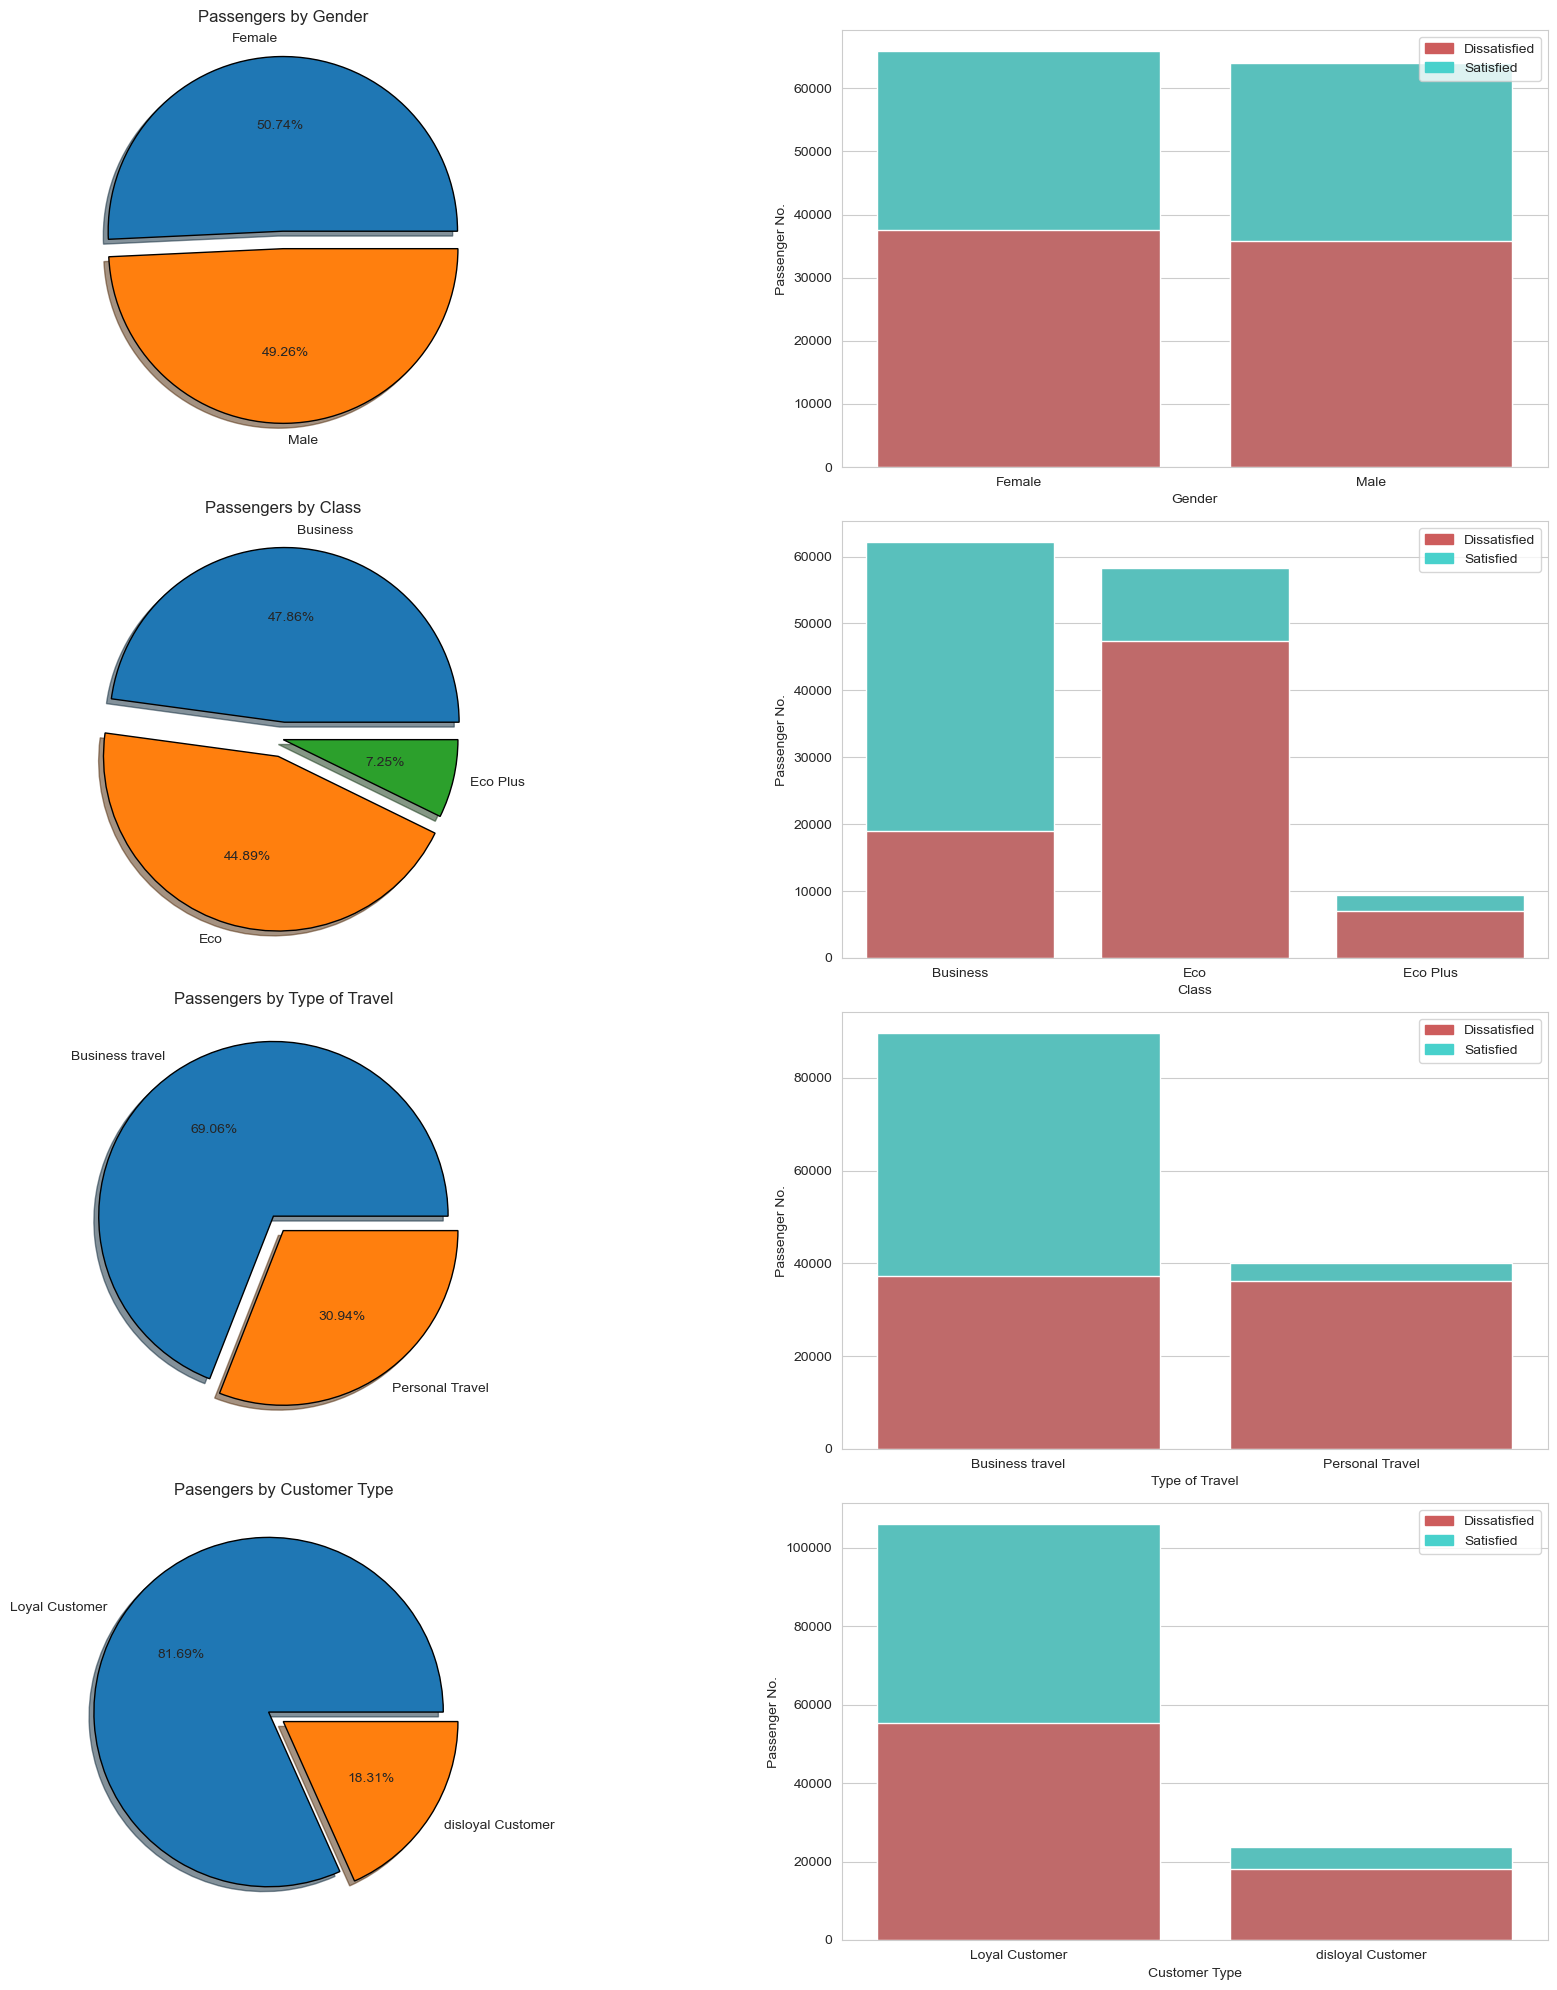

In [23]:
# Drawing side-by-side graphs to easily compare categorical data (gender, class, type of travel, and customer type) 
# between satisfied and dissatisfied passengers.

# Setting plot size - 4 rows by 2 columns, 8 visuals total.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20), gridspec_kw={'width_ratios':[2, 1]})
axes = axes.ravel() # changing 2D array into a flattened continuos array so we can choose location for a visual

# Setting visual style
sns.set_style(style='whitegrid')

# Using functions defined earlier to draw the visuals.

# Passengers by Gender
draw_pie_chart(df['Gender'], 'Passengers by Gender', ax=axes[0])
draw_barplot(df, 'Gender', ax=axes[1])

# Passengers by Class
draw_pie_chart(df['Class'], 'Passengers by Class', ax=axes[2])
draw_barplot(df, 'Class', ax=axes[3])

# Passengers by Type of Travel
draw_pie_chart(df['Type of Travel'], 'Passengers by Type of Travel', ax=axes[4])
draw_barplot(df, 'Type of Travel', ax=axes[5])

# Passengers by Customer Type
draw_pie_chart(df['Customer Type'], 'Pasengers by Customer Type', ax=axes[6])
draw_barplot(df, 'Customer Type', ax=axes[7])

plt.tight_layout()

**Gender:**
- There are more dissatisfied passengers than satisfied regardless of gender;
- Graphs look nearly identical for both men and women;
- **Doesn't seem that we could reach more dissatisfied passengers by targeting either gender.**
    
**Class:**
- Most people travel Business or Eco class, approximately equally divided (~45% each);
- A small percentage of people fly Eco Plus (<10%);
- A vast majority of Eco Plus and Eco passangers tend to be dissatisfied;
- More than half of Business Class passangers tend to be more satisfied;
- **We could reach the largest portion of dissatisfied passengers by tagerting Eco Class specifically.**
    
**Type of Travel:**
- About 70% of people travel for Business, and about 30% for personal reasons;
- A vast majority of passengers traveling for personal reasons tend to be dissatisfied;
- More people traveling for business reasons tend to be satisfied.
- **Doesn't seem that we could reach more dissatisfied passengers by targeting either group.**
    
**Customer Type:**
- Over 80% of passengers are Loyal customers;
- Loyal customers are about as likely to be satisfied as dissatisfied;
- There are around 3 times more dissatisfied disloyal passengers than satisfied.
- **We would reach a larger number of dissatisfied passengers by targeting the Loyal ones.**

**Conclusion: the largest portion of dissatisfied passengers could be reached by targetting either Eco Class, or Loyal Customers (both having approximately 50,000 dissatisfied customers).**

**Due to separation of Eco and Business Classes onboard, targeting dissatisfied customers that way might be the best option.**

### 1.3 Continuous Variables

In [31]:
# Dropping redundant columns:

df = df.drop(columns=['id', 'Arrival Delay in Minutes'])

(-10.0, 100.0)

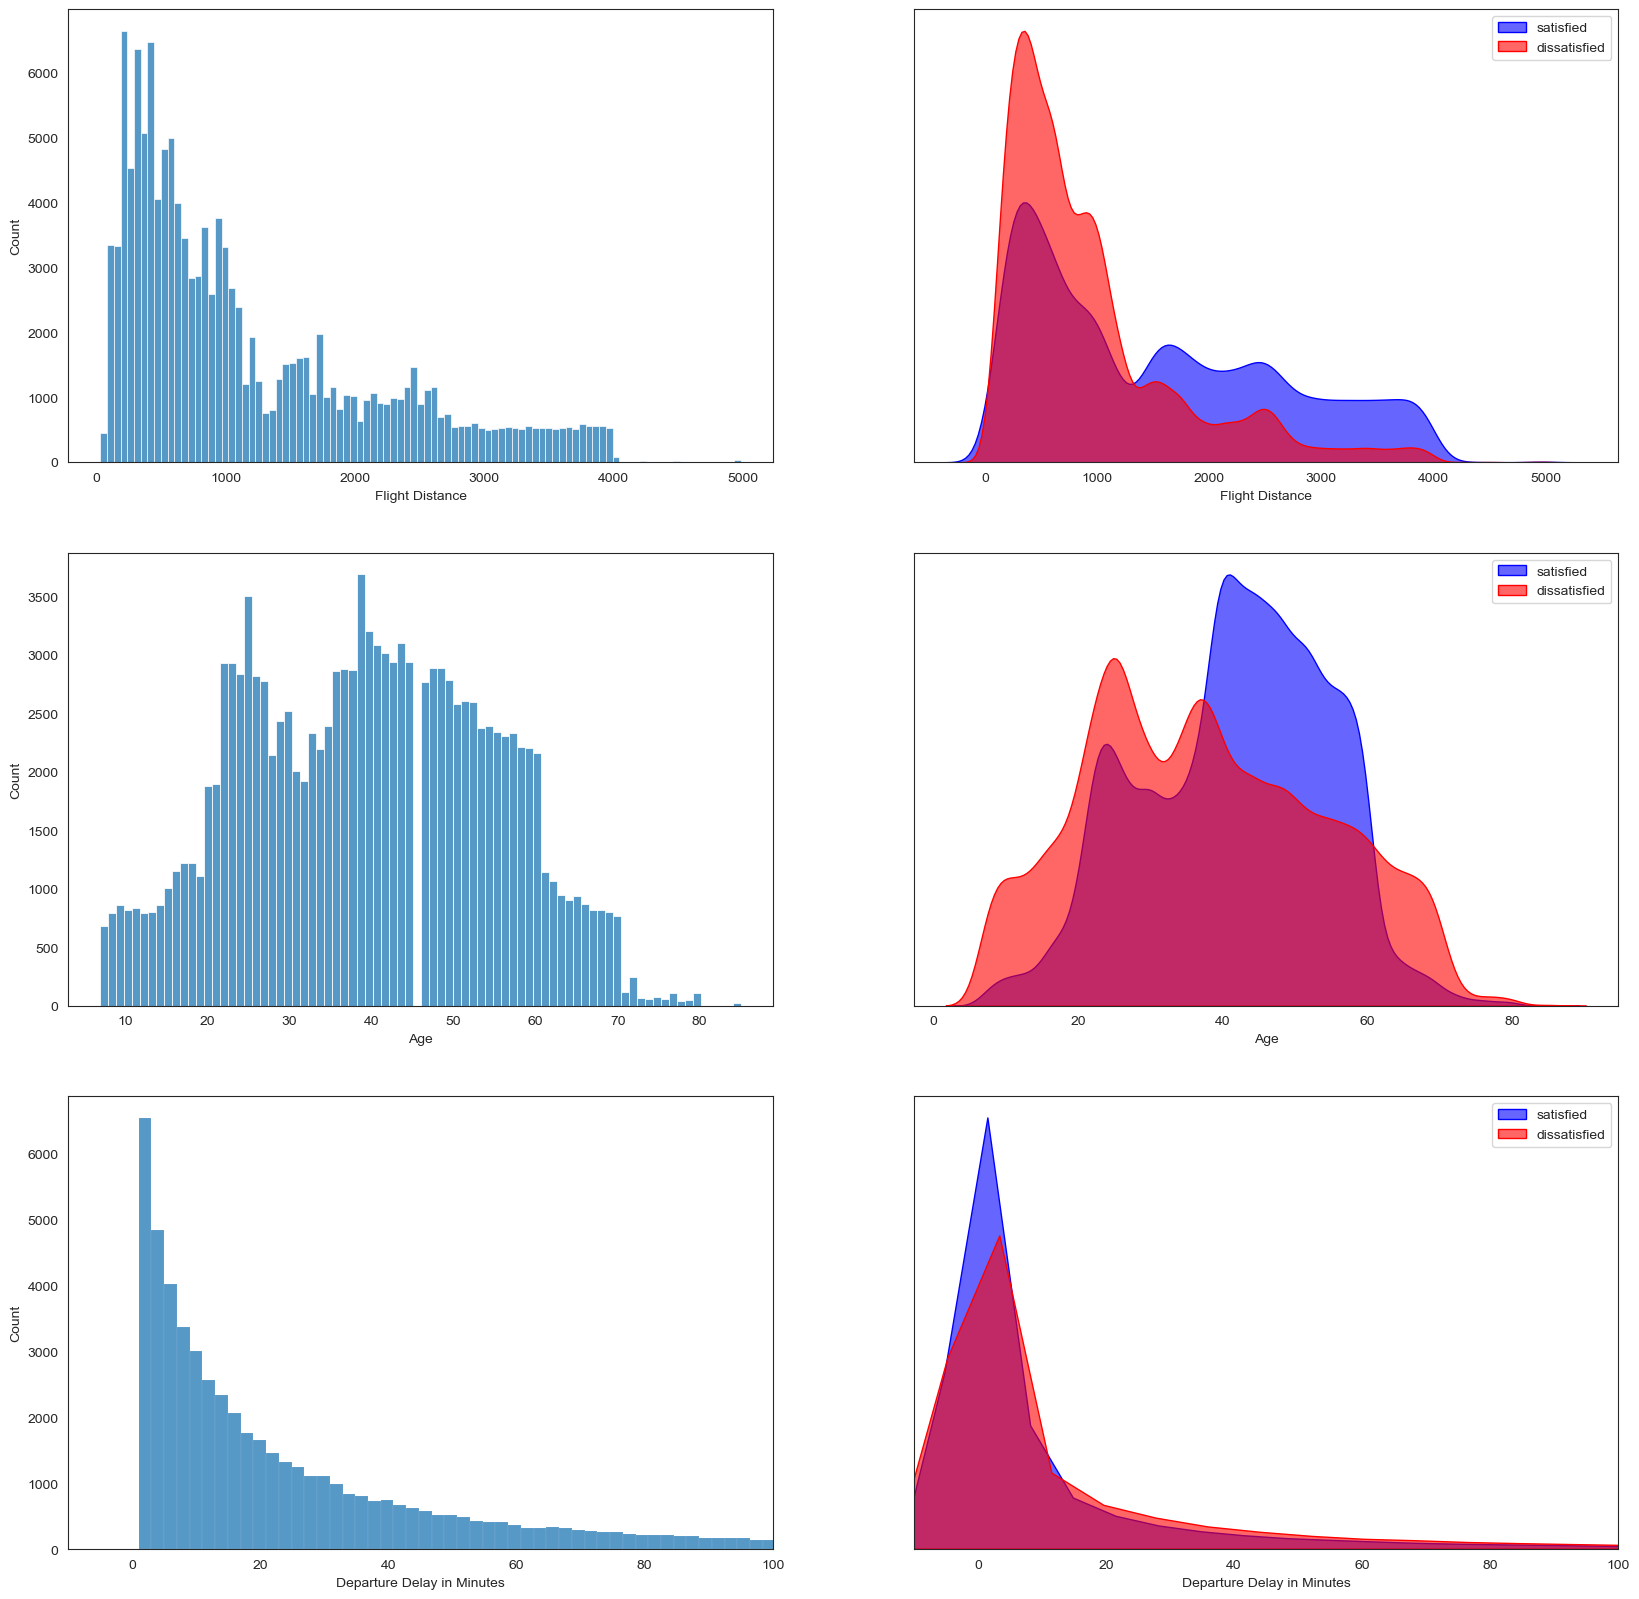

In [32]:
# Visualising continuous variable differences between satisfied and dissatisfied passengers 

# Setting the plot dimensions - 3 rows by 2 columns, 6 in total
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
axes = axes.ravel() # Changing 2D array into a continuos 1d array

# Differences by Flight Distance
sns.histplot(x='Flight Distance', data=df, ax=axes[0])
draw_kde_plot('Flight Distance', ax=axes[1])

# Differences by Age
sns.histplot(x='Age', data=df, ax=axes[2], bins=80)
draw_kde_plot('Age', ax=axes[3])

# Differenecs by Departure Delay
sns.histplot(x='Departure Delay in Minutes', 
             data=df[df['Departure Delay in Minutes'] > 0], 
             ax=axes[4], bins=800)
draw_kde_plot('Departure Delay in Minutes', ax=axes[5])

axes[4].set_xlim(-10, 100)
axes[5].set_xlim(-10, 100)

# I've excluded no-delay (0min) values and set limit to 100mins due to these extremes making the graph unreadable.

- Seems like the majority of flights are <1200km long, and result in more dissatisfied passangers.
- Flights over 1,200km are less popular, but result in more satisfied passangers.
- There is an interesting peak in satisfied passangers between ages 38-61, perhaps that represents business-class-flying population.
- Unsurprisingly, people are more satisfied when flight departs on time.

The strange lack of values in Age histogram at around 46  is misleading and is most likely result of aggregation. The "dips" change in the graph depending on the size of bins indicated.

**Conclusion: Targetting short-distance flights (<1,200km) might affect the satisfaction ratings the most.**

## Part 2: Rating Differenecs

The survey results show us which passengers are overall satisfied with their journeys, and how much they liked different aspects of the flight. I will compare these ratings with those of unsatisfied passengers to know which aspects seem to have biggest differences in ratings between the groups, i.e. might have the biggest effect on overall satisfaction.

In [33]:
# A function that calculates and visualises various flight aspect rating differences between satisfied and dissatisfied
# passengers.

def draw_rating_diff(df, col, group, **kwarg):
    
    # To visualise differences between Flight Aspect Ratings I need to transpose data to long format for a bar plot.
    # First I will separate columns I'm interested in:

    ordinal_columns = ['Inflight wifi service',
           'Departure/Arrival time convenient', 'Ease of Online booking',
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service',
           'Baggage handling', 'Checkin service', 'Inflight service',
           'Cleanliness']
    
    # Calculating mean values for desired group
    if col=='All':
        grouped = df.groupby('satisfaction').mean()[ordinal_columns].reset_index()
    else:
        grouped = df[df[col] == group].groupby('satisfaction').mean()[ordinal_columns].reset_index()
    
    # Transposing the dataframe
    grouped_long = grouped.melt(id_vars='satisfaction')
    
    # Calculating the difference in ratings between satisfied and dissatisfied passengers
    difference = pd.DataFrame(grouped.iloc[1, 1:].subtract(grouped.iloc[0, 1:])).reset_index() 
    
    # Renaming columns
    difference.columns = ['feature', 'rating_difference']
    
    # Sorting rating differeces between satisfied and dissatisfied passengers highest to lowest
    difference = difference.sort_values('rating_difference', ascending=False).reset_index(drop=True)
    
    # Extracting the order of variable names to create correct labels
    order_list = difference['feature'].unique()
    
    # To emphasize flight aspects with largest differences, I will give a different color to those with differene >1
    colors = [1 if dif >= 1 else 0 for dif in difference['rating_difference']]

    sns.barplot(y='feature', x='rating_difference', data=difference, orient='h',
                hue=colors, dodge=False, **kwarg).set(title=group, ylabel='', xlabel='Rating difference')


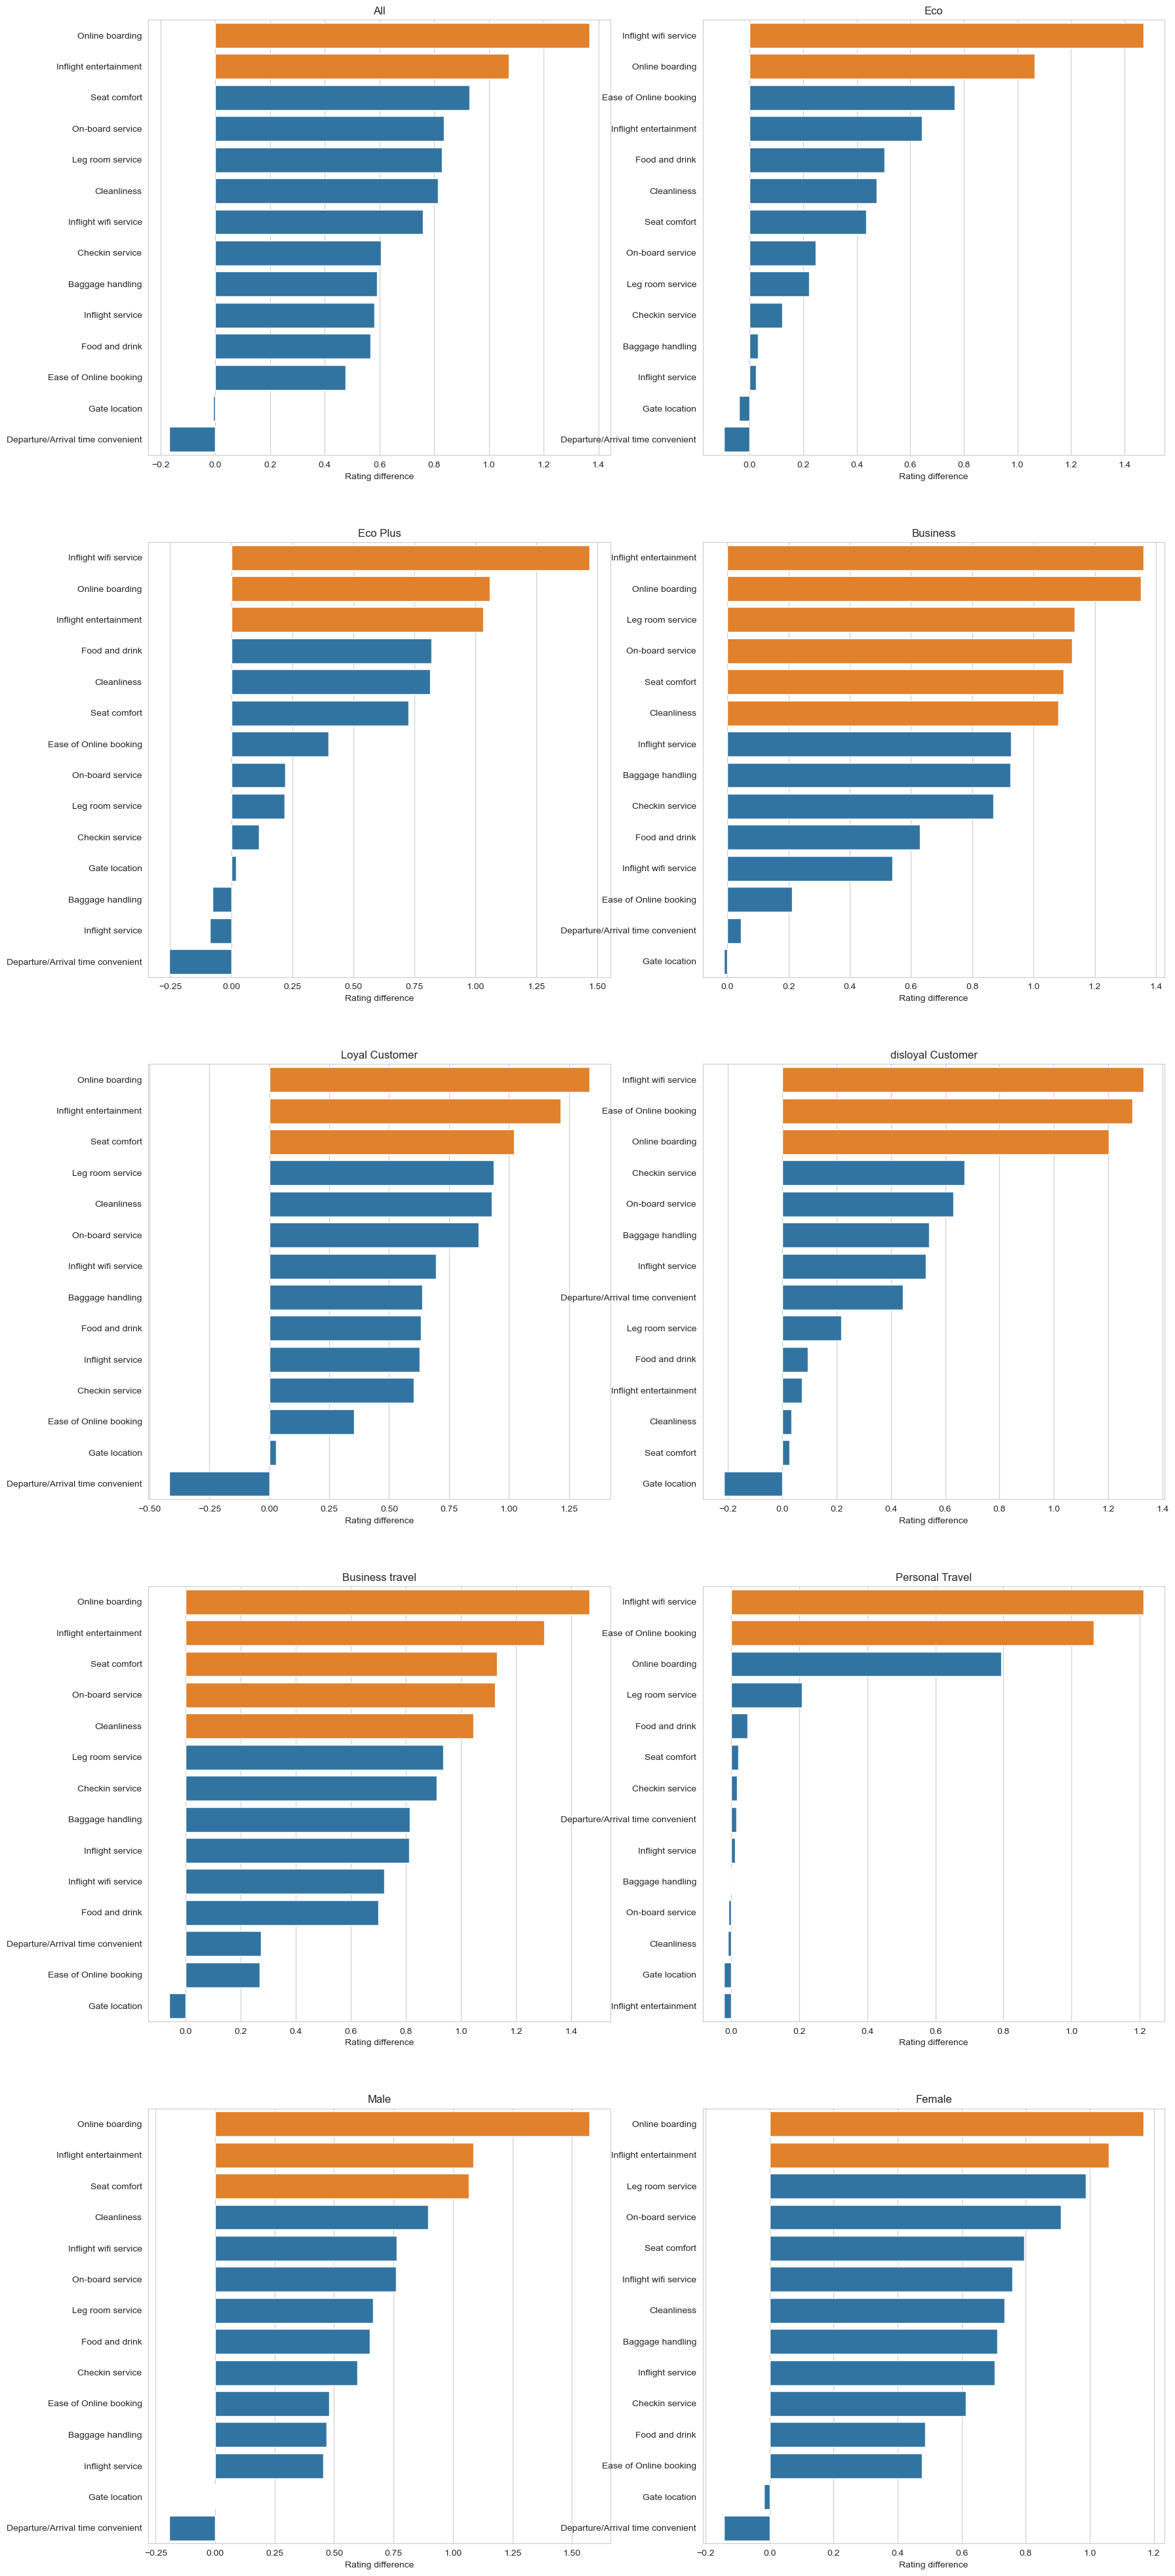

In [34]:
# Visualising the difference in ratings

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,50))
axes = axes.ravel()

draw_rating_diff(df, 'All', 'All', ax=axes[0])

draw_rating_diff(df, 'Class', 'Eco', ax=axes[1])

draw_rating_diff(df, 'Class', 'Eco Plus', ax=axes[2])

draw_rating_diff(df, 'Class', 'Business', ax=axes[3])

draw_rating_diff(df, 'Customer Type', 'Loyal Customer', ax=axes[4])

draw_rating_diff(df, 'Customer Type', 'disloyal Customer', ax=axes[5])

draw_rating_diff(df, 'Type of Travel', 'Business travel', ax=axes[6])

draw_rating_diff(df, 'Type of Travel', 'Personal Travel', ax=axes[7])

draw_rating_diff(df, 'Gender', 'Male', ax=axes[8])

draw_rating_diff(df, 'Gender', 'Female', ax=axes[9])


for ax in axes:
    ax.legend([],[], frameon=False)

**Summary:**
1. The biggest differences between satisfied and dissatisfied passegners overall (avg over 1 point difference) are satisfaction with Online Boarding and Inflight Entertainment.
2. There are differences when comparing passengers by groups, e.g. Class:
- Eco/Eco Plus passengers' satisfaction is most affected by 2 major aspects - Infligh WIFI and Online Boarding
- Satisfaction of Business Class is strongly related to at least 6 aspects- Inflifht Entertainment, Online Boarding, Leg Room Service, On-board Service, Seat Comfort and Cleanliness.

**Conclusion: the best way to improve passenger satisfaction would be to improve Inflight Wifi service and Online Boarding service, which would reach the vast majority of dissatisfied passengers flying Eco/Eco Plus class, and would have postive effect on Business Class. However, to have significant effect on Business Class, nearly half of measured flight aspects would need to be improved.**

# Results
## 1. Eco/Eco Plus passengers (<1,450km)  are more likely to be dissatsfied.

## 2. Biggest differences between satisfied and dissatified Eco/Eco Plus passengers are their satisfaction with Online Boarding and Inflight Wifi aspects of the flight.**

## 3. Improving Inflight Wifi and Online Boarding for Eco/Eco Class passengers on short-distance flights would have the largest effects.